In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
#os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/MyDrive/kaggle competitions/"

In [ ]:
#!mkdir '/content/drive/MyDrive/kaggle competitions/satellite-image-classification/'
%cd '/content/drive/MyDrive/kaggle competitions/satellite-image-classification/'

/content/drive/MyDrive/kaggle competitions/satellite-image-classification


In [ ]:
#!kaggle datasets download -d mahmoudreda55/satellite-image-classification

 23% 5.00M/21.8M [00:00<00:00, 31.8MB/s]
100% 21.8M/21.8M [00:00<00:00, 96.9MB/s]


In [ ]:
#!unzip '/content/drive/MyDrive/kaggle competitions/satellite-image-classification/satellite-image-classification.zip'

In [ ]:
os.listdir('/content/drive/MyDrive/kaggle competitions/satellite-image-classification/data')

['cloudy', 'desert', 'green_area', 'water']

In [ ]:
data_dir = '/content/drive/MyDrive/kaggle competitions/satellite-image-classification/data'

In [ ]:
for cl in os.listdir(data_dir):
  print(f'No. of images of {cl} class: {len(os.listdir(os.path.join(data_dir, cl)))}')

No. of images of cloudy class: 1500
No. of images of desert class: 1131
No. of images of green_area class: 1500
No. of images of water class: 1500


In [ ]:
n_classes = len(os.listdir(data_dir))
n_classes

4

In [ ]:
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
from torchvision.datasets import ImageFolder
import torchvision.transforms as tt
from torchvision.utils import make_grid
from torch.utils.data import DataLoader, random_split
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# tensor([0.4002, 0.4314, 0.4275]) # mean
# tensor([0.0373, 0.0329, 0.0330]) # std
stats = ((0.4002, 0.4314, 0.4275), (0.0373, 0.0329, 0.0330))
tfms = tt.Compose([tt.Resize([64, 64]),
                   tt.RandomHorizontalFlip(0.2),
                   tt.RandomVerticalFlip(0.2),
                   tt.ToTensor(),
                   tt.Normalize(*stats, inplace=True)])

In [ ]:
def denormalize(images, means, stds):
  means = torch.tensor(means).reshape(1, 3, 1, 1)
  stds = torch.tensor(stds).reshape(1, 3, 1, 1)
  return images * stds + means

def show_batch(dl):
  for images, _ in dl:
    print(images.shape)
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.set_xticks([]); ax.set_yticks([])
    denorm_images = denormalize(images, *stats)
    ax.imshow(make_grid(denorm_images, nrow=10).permute(1, 2, 0).clamp(0, 1))
    break

In [ ]:
dataset = ImageFolder(root=data_dir, transform=tfms)

In [ ]:
len(dataset)

5631

In [ ]:
val_size = 631
train_size = len(dataset) - val_size

train_ds, val_ds = random_split(dataset, [train_size, val_size])

test_size = int(val_size * 0.2)
val_size = val_size - test_size
val_ds, test_ds = random_split(val_ds, [val_size, test_size])
len(train_ds), len(val_ds), len(test_ds)

(5000, 505, 126)

In [ ]:
batch_size = 100

train_dl = DataLoader(train_ds, batch_size, shuffle=True, num_workers=2, pin_memory=True)
val_dl = DataLoader(val_ds, batch_size*2, num_workers=2, pin_memory=True)
test_dl = DataLoader(test_ds, batch_size=50, num_workers=2, pin_memory=True)

In [ ]:
#loader = DataLoader(dataset, 100)

In [ ]:
# nimages = 0
# mean = 0.0
# var = 0.0
# for i_batch, batch_target in enumerate(loader):
#     batch = batch_target[0]
#     # Rearrange batch to be the shape of [B, C, W * H]
#     batch = batch.view(batch.size(0), batch.size(1), -1)
#     # Update total number of images
#     nimages += batch.size(0)
#     # Compute mean and std here
#     mean += batch.mean(2).sum(0)
#     var += batch.var(2).sum(0)

# mean /= nimages
# var /= nimages
# std = torch.sqrt(var)

# print(mean)
# print(std)

tensor([-0.0009, -0.0005,  0.0013])
tensor([1.0006, 1.0001, 0.9989])


torch.Size([3, 128, 128])
1 desert


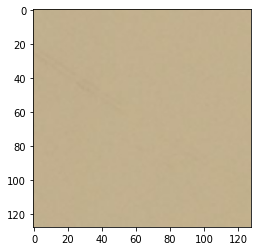

In [ ]:
# img, label = dataset[2334]
# print(img.shape)
# print(label, dataset.classes[label])
# plt.imshow(img.permute(1,2,0));

torch.Size([100, 3, 64, 64])


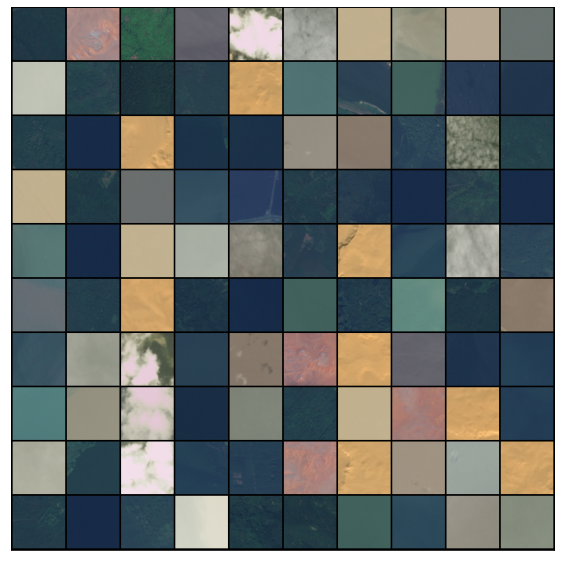

In [ ]:
show_batch(train_dl)

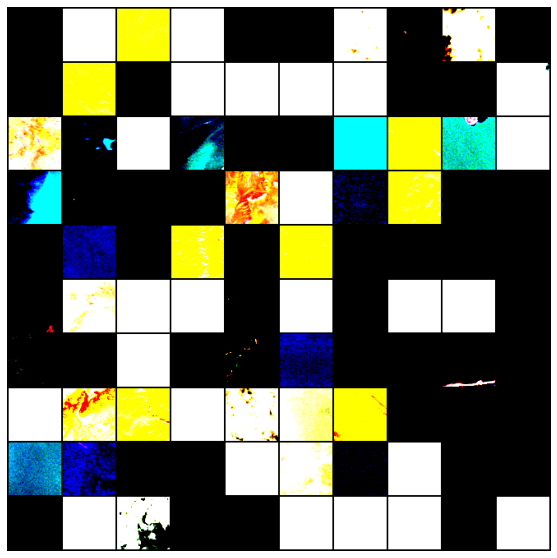

In [ ]:
for images, _ in train_dl:
  plt.figure(figsize=(10,10))
  plt.axis('off')
  plt.imshow(make_grid(images, nrow=10).permute(1,2,0))
  break

torch.Size([3, 64, 64])
0 cloudy
tensor([[[ 9.6671,  9.6671,  9.7723,  ...,  9.9825,  9.9825,  9.9825],
         [ 9.6671,  9.6671,  9.7723,  ...,  9.6671,  9.7723,  9.7723],
         [ 9.4569,  9.4569,  9.5620,  ...,  9.5620,  9.5620,  9.5620],
         ...,
         [ 7.8798,  7.8798,  7.7747,  ...,  8.1952,  8.1952,  8.1952],
         [ 7.8798,  7.8798,  7.8798,  ...,  8.1952,  8.1952,  8.1952],
         [ 7.8798,  7.8798,  7.8798,  ...,  8.1952,  8.1952,  8.1952]],

        [[10.0117, 10.0117, 10.1309,  ..., 10.3693, 10.3693, 10.3693],
         [10.0117, 10.0117, 10.1309,  ..., 10.1309, 10.1309, 10.1309],
         [ 9.8925,  9.8925,  9.8925,  ..., 10.0117,  9.8925,  9.8925],
         ...,
         [ 8.1045,  8.1045,  8.1045,  ...,  8.4621,  8.3429,  8.5813],
         [ 8.2237,  8.2237,  8.2237,  ...,  8.4621,  8.4621,  8.5813],
         [ 8.2237,  8.2237,  8.2237,  ...,  8.3429,  8.3429,  8.3429]],

        [[ 8.7923,  8.7923,  8.7923,  ...,  8.9112,  8.9112,  8.9112],
         [ 8

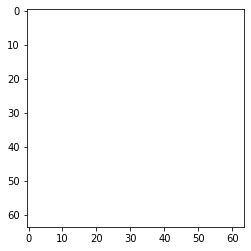

In [ ]:
img, label = train_ds[2334]
print(img.shape)
print(label, dataset.classes[label])
plt.imshow(img.permute(1,2,0));

In [ ]:
def accuracy(out, targets):
  _, preds = torch.max(out, dim=1)
  return torch.tensor(torch.sum(preds == targets).item() / len(preds))

In [ ]:
class ClassificationBase(nn.Module):
  def training_step(self, batch):
    xb, targets = batch
    out = self(xb)
    loss = F.cross_entropy(out, targets)
    return loss
  def validation_step(self, batch):
    xb, targets = batch
    out = self(xb)
    loss = F.cross_entropy(out, targets)
    acc = accuracy(out, targets)
    return {'loss': loss, 'acc': acc}
  def validation_epoch_end(self, res):
    losses = [x['loss'] for x in res]
    loss = torch.stack(losses).mean()
    accs = [x['acc'] for x in res]
    acc = torch.stack(accs).mean()
    return {'loss': loss.item(), 'acc': acc.item()}
  def epoch_end(self, epoch, res):
    print(f'Epoch: [{epoch}], Last lr: [{res["lrs"][-1]}], Train loss: [{round(res["train_loss"], 4)}], Val loss: [{round(res["loss"], 4)}], Val acc: [{round(res["acc"], 4)}]')

In [ ]:
@torch.no_grad()
def evaluate(model, dl):
  model.eval()
  res = [model.validation_step(batch) for batch in dl]
  return model.validation_epoch_end(res)

def get_lr(optimizer):
  for param_group in optimizer.param_groups:
    return param_group['lr']

def fit_one_cycle(epochs, model, train_dl, val_dl, max_lr,
                  weight_decay=0, grad_clip=None, opt_f=torch.optim.SGD):
  torch.cuda.empty_cache()
  history = []
  optimizer = opt_f(model.parameters(), max_lr)
  sched = torch.optim.lr_scheduler.OneCycleLR(optimizer, max_lr, epochs=epochs,
                                              steps_per_epoch=len(train_dl))
  for epoch in range(epochs):
    model.train()
    train_losses = []
    lrs = []
    for batch in train_dl:
      loss = model.training_step(batch)
      train_losses.append(loss)
      loss.backward()
      if grad_clip:
        nn.utils.clip_grad_value_(model.parameters(), grad_clip)
      optimizer.step()
      optimizer.zero_grad()
      lrs.append(get_lr(optimizer))
      sched.step()
    res = evaluate(model, val_dl)
    res['train_loss'] = torch.stack(train_losses).mean().item()
    res['lrs'] = lrs
    history.append(res)
    model.epoch_end(epoch, res)
  return history

In [ ]:
def get_default_device():
  if torch.cuda.is_available():
    return torch.device('cuda')
  else:
    return torch.device('cpu')

def to_device(data, device):
  if isinstance(data, (list, tuple)):
    return [to_device(x, device) for x in data]
  return data.to(device, non_blocking=True)

class DeviceDataLoader():
  def __init__(self, dl, device):
    self.dl = dl
    self.device = device
  def __iter__(self):
    for b in self.dl: yield to_device(b, self.device)
  def __len__(self):
    return len(self.dl)

In [ ]:
def conv_block(in_channels: int, out_channels: int, pool: bool=False):
  layers = [nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1),
            nn.BatchNorm2d(out_channels),
            nn.ReLU()]
  if pool: layers.append(nn.MaxPool2d(2))
  return nn.Sequential(*layers)

In [ ]:
class Model1(ClassificationBase):
  def __init__(self, in_channels: int=3, n_classes: int=4):
    super().__init__()
    self.conv1 = conv_block(in_channels, 32) # 32 x 64 x 64
    self.conv2 = conv_block(32, 64, pool=True) # 64 x 32 x 32
    self.res1 = nn.Sequential(conv_block(64, 64), conv_block(64, 64)) # 64 x 32 x 32

    self.conv3 = conv_block(64, 128, pool=True) # 128 x 16 x 16
    self.conv4 = conv_block(128, 256, pool=True) # 256 x 8 x 8
    self.res2 = nn.Sequential(conv_block(256, 256), conv_block(256, 256)) # 256 x 8 x 8

    self.conv5 = conv_block(256, 512, pool=True) # 512 x 4 x 4
    self.conv6 = conv_block(512, 1024, pool=True) # 1024 x 2 x 2
    self.res3 = nn.Sequential(conv_block(1024, 1024), conv_block(1024, 1024)) # 1024 x 2 x 2

    self.classifier = nn.Sequential(nn.MaxPool2d(2),
                                    nn.Flatten(),
                                    nn.Linear(1024, 512),
                                    nn.ReLU(),
                                    nn.Linear(512, 256),
                                    nn.ReLU(),
                                    nn.Linear(256, n_classes))
  def forward(self, xb):
    out = self.conv1(xb)
    out = self.conv2(out)
    out = self.res1(out) + out
    out = self.conv3(out)
    out = self.conv4(out)
    out = self.res2(out) + out
    out = self.conv5(out)
    out = self.conv6(out)
    out = self.res3(out) + out
    out = self.classifier(out)
    return out

In [ ]:
device = get_default_device()
device

device(type='cuda')

In [ ]:
train_dl = DeviceDataLoader(train_dl, device)
val_dl = DeviceDataLoader(val_dl, device)
test_dl = DeviceDataLoader(test_dl, device)
model1 = to_device(Model1(), device)
model1

Model1(
  (conv1): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
  )
  (conv2): Sequential(
    (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (res1): Sequential(
    (0): Sequential(
      (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
    )
    (1): Sequential(
      (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
    )
  )
  (conv3): Sequential(
    (0): Conv2d(64, 

In [ ]:
epochs = 40
max_lr = 0.05
grad_clip = 0.01
weight_decay = 1e-4
opt_f = torch.optim.Adam

In [ ]:
history1 = [evaluate(model1, val_dl)]
history1

[{'acc': 0.14825396239757538, 'loss': 1.3868420124053955}]

In [ ]:
history1 += fit_one_cycle(epochs, model1, train_dl, val_dl, max_lr,
                          weight_decay=weight_decay,
                          grad_clip=grad_clip,
                          opt_f=opt_f)

In [ ]:
evaluate(model1, test_dl)

{'acc': 0.947692334651947, 'loss': 0.14187726378440857}

In [ ]:
def plot_accs(history):
  accs = [x['acc'] for x in history]
  plt.figure(figsize=(25,9))
  plt.plot(accs, '-x')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy score')
  plt.title('MODEL ACCURACY x EPOCH N.');

In [ ]:
def plot_losses(history):
  val_losses = [x['loss'] for x in history]
  train_losses = [x.get('train_loss') for x in history]
  plt.figure(figsize=(25,9))
  plt.plot(train_losses, label='Train')
  plt.plot(val_losses, label='Validation')
  plt.xlabel('Epoch')
  plt.ylabel('Cross-entropy score')
  plt.title('MODEL LOSSES x EPOCH N.')
  plt.legend();

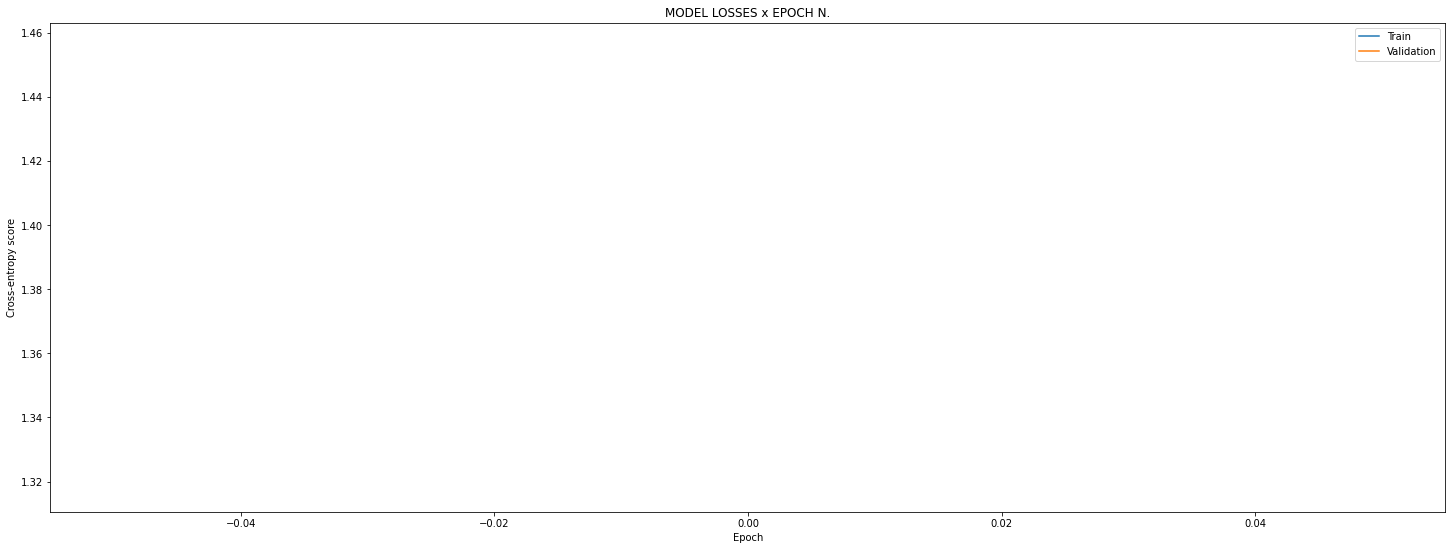

In [ ]:
plot_losses(history1)